In [58]:
import pandas as pd

# Load the data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Check basic info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Show statistical summary for numerical columns
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Check missing values in each column
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

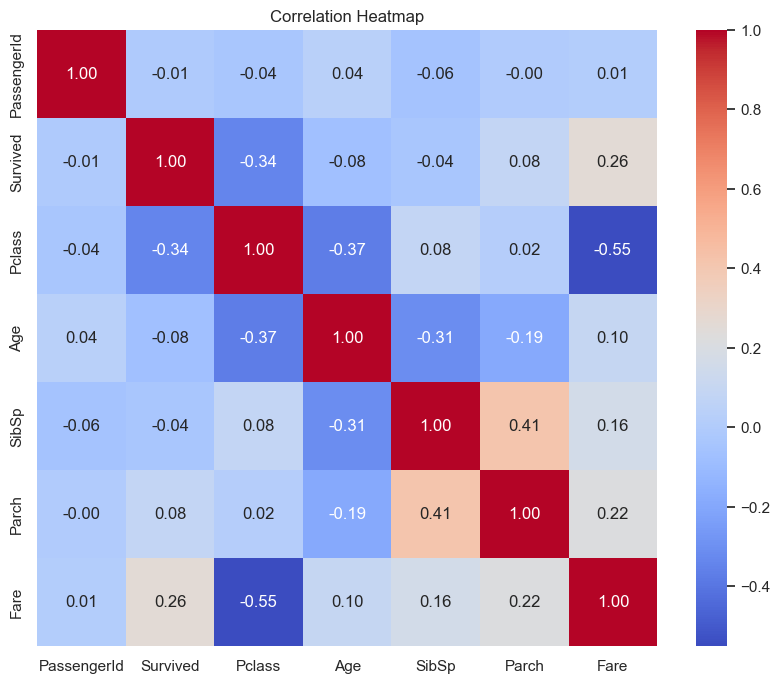

In [17]:
# Calculate correlation only on numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


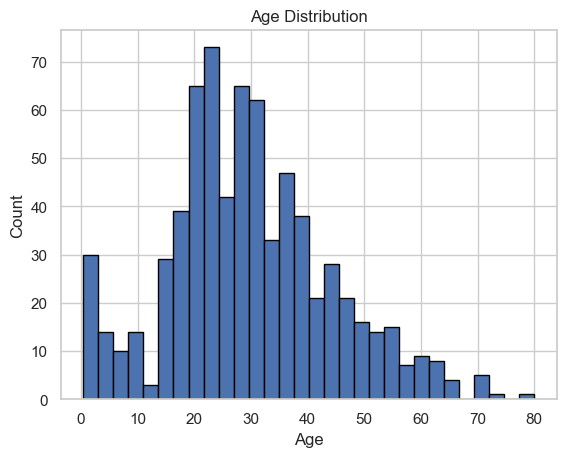

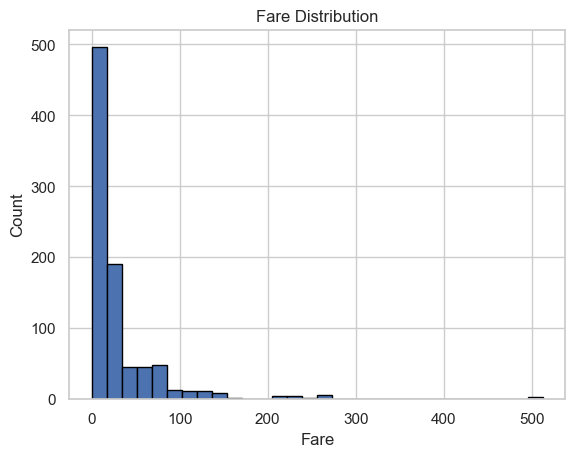

In [19]:
# Plot Age distribution
train_df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot Fare distribution
train_df['Fare'].hist(bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

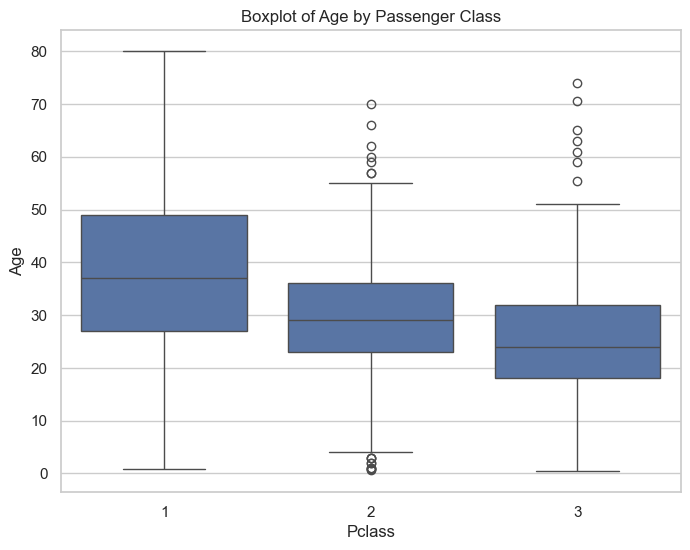

In [21]:
# d. Boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Boxplot of Age by Passenger Class')
plt.show()

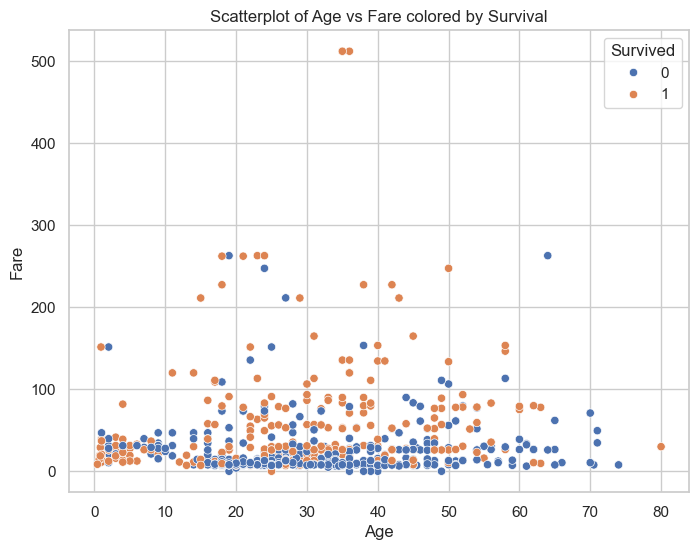

In [23]:
# e. Scatterplots
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Scatterplot of Age vs Fare colored by Survival')
plt.show()

Some Basic Observations:
- Younger passengers seem to have higher survival rates.
- Females had much higher survival rates than males.
- First class passengers had a much higher chance of survival.
- Higher Fare seems slightly correlated with higher survival.


Summary:

1. Survival rate was higher for:
    - Females
    - Younger passengers
    - First class passengers
2. Age, Fare, Pclass, and Sex seem important features.
3. There are missing values in 'Age', 'Cabin', and 'Embarked' columns.

In [31]:
# Load test data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
# Fill missing Age with median
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Fare with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\arunk\AppData\Local\Temp\ipykernel_49420\3527079652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\arunk\AppData\Local\Temp\ipykernel_49420\3527079652.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [37]:
# Create a new 'Survived' column
# Assume: All females survived, all males did not survive

test_df['Survived'] = 0   # Default everyone to not survived
test_df.loc[test_df['Sex'] == 'female', 'Survived'] = 1

In [39]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_df[features]
X_test = test_df[features]

In [41]:
# Convert 'Sex' to numeric
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

C:\Users\arunk\AppData\Local\Temp\ipykernel_49420\3676260772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
C:\Users\arunk\AppData\Local\Temp\ipykernel_49420\3676260772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Initialize
model = DecisionTreeClassifier()

# Train
model.fit(X_train, train_df['Survived'])

DecisionTreeClassifier()

In [49]:
# Predict on test data
predictions = model.predict(X_test)

In [51]:
# Create final submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [53]:
# Predict on training data itself
train_predictions = model.predict(X_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(train_df['Survived'], train_predictions)

print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.98
